**Importing Required Libraries**

In [ ]:
import missingno as msno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, roc_auc_score

**Reading Data**

In [ ]:
cust=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Descriptive Statistics**

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
cust.shape

(7043, 21)

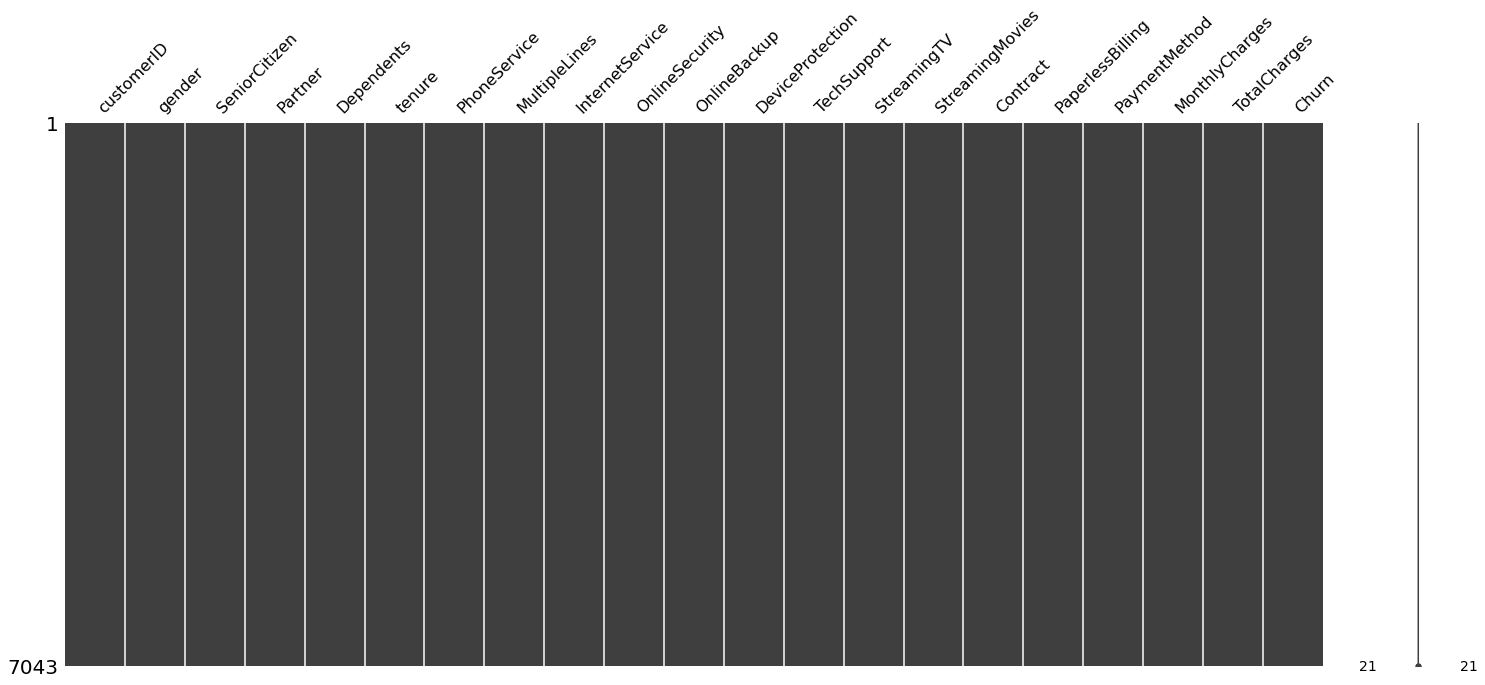

In [ ]:
msno.matrix(cust)

In [ ]:
cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:

cust.drop(labels=cust[cust["tenure"]==0].index,axis=0, inplace = True)
cust[cust["tenure"]==0].index

Int64Index([], dtype='int64')

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cust[numerical_cols].describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


In [ ]:
cust["SeniorCitizen"]= cust["SeniorCitizen"].map({0: "No", 1: "Yes"})
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploaratory Data Analysis**

In [ ]:
gender_labels = ['Male', 'Female']
fig=go.Figure()
fig.add_trace(go.Pie(labels=gender_labels, values=cust['gender'].value_counts(), name="Gender"))
fig.update_traces(hole=.5, hoverinfo="label+percent+name", textfont_size=25)
fig.update_layout(title_text="Gender Distributions",annotations=[dict(text='Gender', x=0.1, y=0.1, font_size=20, showarrow=False)])
fig.show()

In [ ]:
churn_labels = ['No', 'Yes']
fig=go.Figure()
fig.add_trace(go.Pie(labels=churn_labels, values=cust['Churn'].value_counts(), name="Churn"))
fig.update_traces(hole=.5, hoverinfo="label+percent+name", textfont_size=25)
fig.update_layout( title_text=" Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [ ]:
cust["Churn"][cust["Churn"]=="No"].groupby(by=cust["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
cust["Churn"][cust["Churn"]=="Yes"].groupby(by=cust["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [ ]:
fig = px.histogram(cust, x="Churn", color="Contract", barmode="group", title="<b>Churn w.r.t Customer contract distribution</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
labels = cust['PaymentMethod'].unique()
values = cust['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="PaymentMethod", title="<b>Churn w.r.t Customer Payment Method distribution</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="PaperlessBilling", title="<b>Paperless Billing w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="InternetService", title="<b>Churn wrt InternerService</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="PhoneService", title="<b>Churn wrt PhoneService</b>")
fig.update_layout(width=700, bargap=0.1) 
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="SeniorCitizen", title="<b>Churn wrt SeniorCitizen</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="Partner", title="<b>Churn wrt Partner Status</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="Dependents", title="<b>Churn wrt Dependent Status</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
fig = px.histogram(cust, x="Churn", color="MultipleLines", title="<b>Churn wrt Multiple Lines Distrubution</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="OnlineSecurity", title="<b>Churn wrt OnlineSecurity</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="OnlineBackup", title="<b>Churn wrt OnlineBackup</b>")
fig.update_layout(width=700, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="DeviceProtection", title="<b>Churn wrt DeviceProtection</b>")
fig.update_layout(width=600, bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="TechSupport", title="<b>Churn wrt TechSupport</b>")
fig.update_layout(width=600, bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="StreamingTV", title="<b>Churn wrt StreamingTV</b>")
fig.update_layout(width=600,bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(cust, x="Churn", color="StreamingMovies", title="<b>Churn wrt StreamingMovies</b>")
fig.update_layout(width=600, bargap=0.2)
fig.show()

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

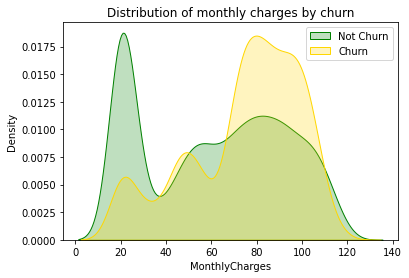

In [ ]:
import seaborn as sns
ax=sns.kdeplot(cust.MonthlyCharges[(cust["Churn"]=="No")],color="Green", shade=True)
ax=sns.kdeplot(cust.MonthlyCharges[(cust["Churn"]=="Yes")],ax=ax, color="Gold", shade=True) 
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_title('Distribution of monthly charges by churn')

**Correlation Plot**

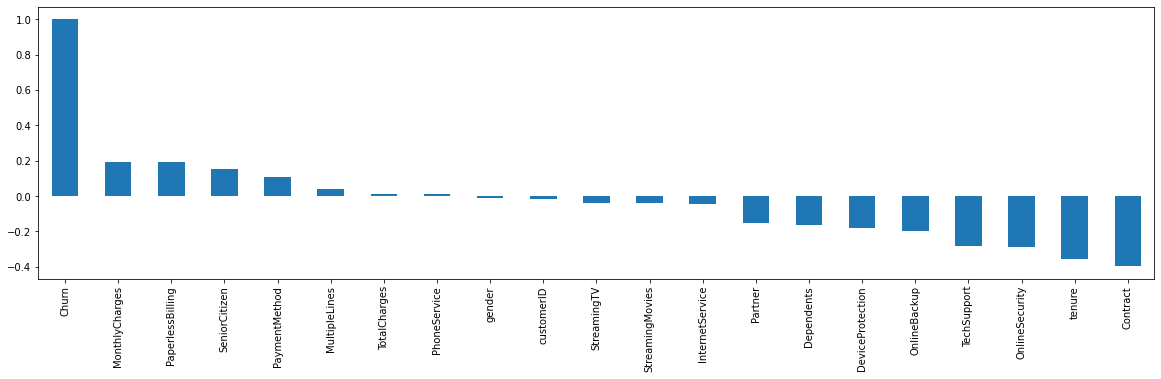

In [ ]:
plt.figure(figsize=(16,10))
cust.corr()['Churn'].sort_values(ascending=False).plot(kind="bar", figsize=(20,5))

In [ ]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Getting Data Ready for Modelling**

In [ ]:
def encoding(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [ ]:
cust = cust.apply(lambda x: encoding(x))
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2504,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1465,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,156,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1399,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,924,1


In [ ]:
X = cust.drop(columns=["customerID","Churn"])
y = cust["Churn"].values

**Splitting Data into train and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(numerical_cols) - set(cat_cols_ohe))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms=MinMaxScaler()

In [ ]:
scaler= StandardScaler()

X_train[numerical_cols] = mms.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = mms.transform(X_test[numerical_cols])

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

**Data Modelling**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 15) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
roc_score = roc_auc_score(y_test, predicted_y)
print("KNN accuracy:",accuracy_knn)
print(roc_score)

KNN accuracy: 0.7677725118483413
0.6798175811201292


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1549
           1       0.46      0.83      0.59       561

    accuracy                           0.69      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.79      0.69      0.71      2110



**Support Vector Machine**

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(x_train_smote,y_train_smote)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7563981042654029


**Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))


0.8123222748815165


**AdaBoost Classifier**

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=500)
ada_model.fit(x_train_smote,y_train_smote)
predict_y = ada_model.predict(X_test)
roc_auc_ada = roc_auc_score(y_test,predict_y)
print("Adaboost ROC score is :",roc_auc_ada)

Adaboost ROC score is : 0.7196840236182506


In [ ]:
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.7545023696682465

In [ ]:
gbc_model = GradientBoostingClassifier(n_estimators=200)
gbc_model.fit(X_train,y_train)
predict_y = gbc_model.predict(X_test)
roc_auc_gbc = roc_auc_score(y_test,predict_y)
print("Adaboost ROC score is :",roc_auc_gbc)

Adaboost ROC score is : 0.7293481275367122


In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,50,100,200,300,500]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier()
gbc_cv=GridSearchCV(gbc,parameters,cv=5)
gbc_cv.fit(X_train,y_train)
print(gbc_cv.score(X_test, y_test))
gbc_cv.best_params_